In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!ls

add_padding.ipynb  notebooks.md  patching.ipynb


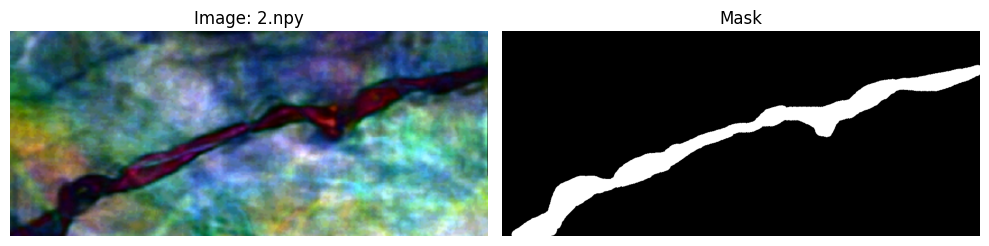

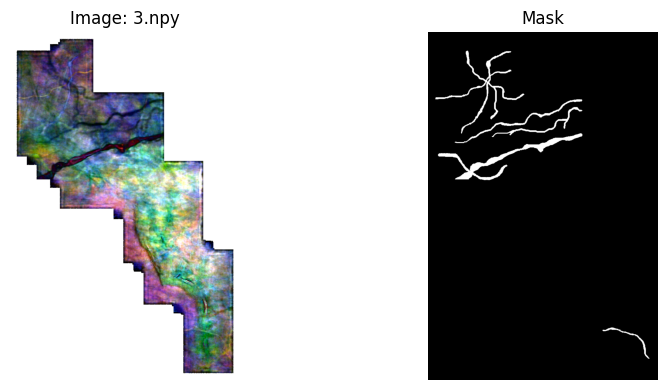

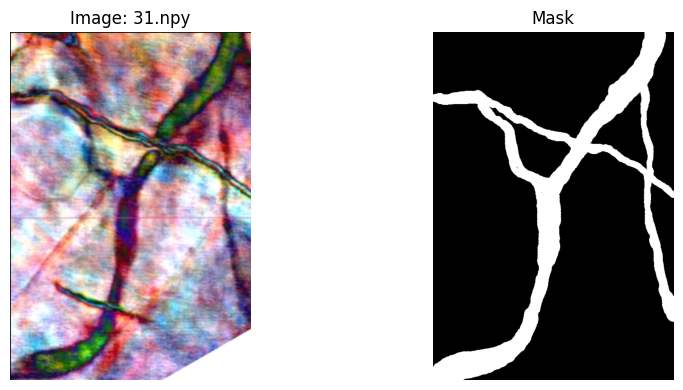

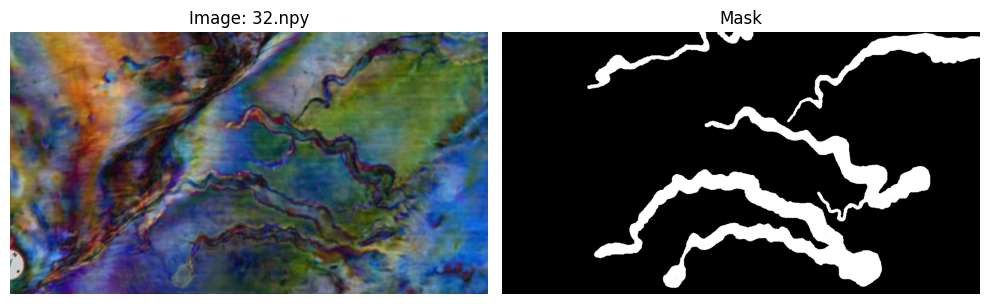

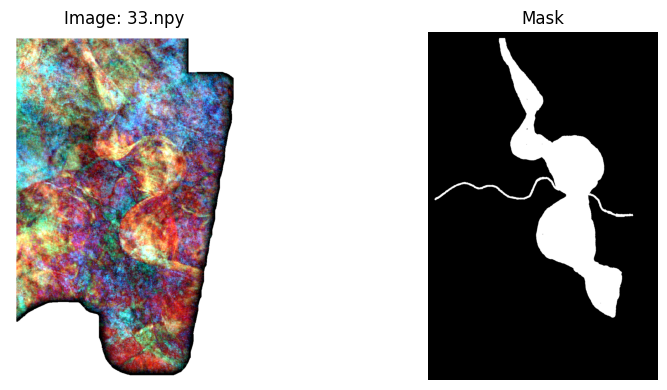

In [6]:
images_dir = "../data/raw/val/images"
masks_dir = "../data/raw/val/masks"

image_files = sorted([
    f for f in os.listdir(images_dir)
    if f.endswith(".npy")
])

for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] нет маски для {fname}")
        continue

    image = np.load(img_path)
    mask = np.load(mask_path)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(f"Image: {fname}")
    axes[0].axis("off")

    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [7]:
for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    image = np.load(img_path)
    mask = np.load(mask_path)

    print(f'{image.shape[0]}, {image.shape[1]}')


442, 1032
1034, 682
787, 544
700, 1275
1098, 724


In [9]:
IMG_DIR = images_dir
MASK_DIR = masks_dir

OUT_IMG_DIR = "../data/padded/val/images"
OUT_MASK_DIR = "../data/padded/val/masks"

os.makedirs(OUT_IMG_DIR, exist_ok=True)
os.makedirs(OUT_MASK_DIR, exist_ok=True)

TARGET_H = 512
TARGET_W = 512


def pad_image_white(img, target_h, target_w):
    h, w, c = img.shape

    # padding по высоте
    if h < target_h:
        pad_h = target_h - h
        # дублируем последнюю строку белым цветом
        white_row = np.ones((1, w, c), dtype=img.dtype) * 255
        img = np.concatenate([img, np.repeat(white_row, pad_h, axis=0)], axis=0)

    # padding по ширине
    if w < target_w:
        pad_w = target_w - w
        # дублируем последний столбец белым цветом
        white_col = np.ones((img.shape[0], 1, c), dtype=img.dtype) * 255
        img = np.concatenate([img, np.repeat(white_col, pad_w, axis=1)], axis=1)

    return img


def pad_mask_zeros(mask, target_h, target_w):
    h, w = mask.shape
    padded = np.zeros((max(h, target_h), max(w, target_w)), dtype=mask.dtype)
    padded[:h, :w] = mask
    return padded


files = sorted(f for f in os.listdir(IMG_DIR) if f.endswith(".npy"))

for fname in files:
    img_path = os.path.join(IMG_DIR, fname)
    mask_path = os.path.join(MASK_DIR, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] нет маски для {fname}")
        continue

    img = np.load(img_path)
    mask = np.load(mask_path)

    img_padded = pad_image_white(img, TARGET_H, TARGET_W)
    mask_padded = pad_mask_zeros(mask, TARGET_H, TARGET_W)

    np.save(os.path.join(OUT_IMG_DIR, fname), img_padded)
    np.save(os.path.join(OUT_MASK_DIR, fname), mask_padded)

    print(f"[OK] {fname}: img {img.shape} → {img_padded.shape}, mask {mask.shape} → {mask_padded.shape}")


[OK] 2.npy: img (442, 1032, 3) → (512, 1032, 3), mask (442, 1032) → (512, 1032)
[OK] 3.npy: img (1034, 682, 3) → (1034, 682, 3), mask (1034, 682) → (1034, 682)
[OK] 31.npy: img (787, 544, 3) → (787, 544, 3), mask (787, 544) → (787, 544)
[OK] 32.npy: img (700, 1275, 3) → (700, 1275, 3), mask (700, 1275) → (700, 1275)
[OK] 33.npy: img (1098, 724, 3) → (1098, 724, 3), mask (1098, 724) → (1098, 724)


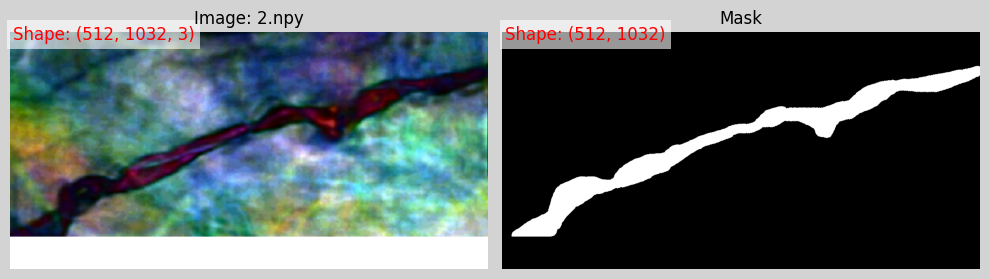

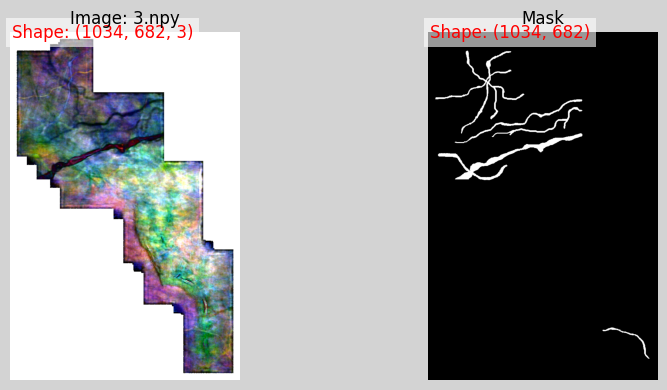

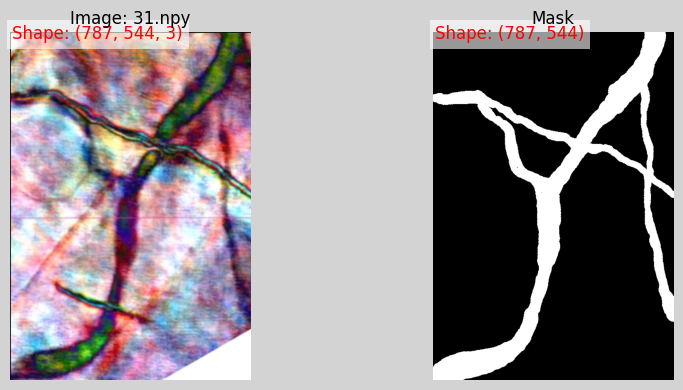

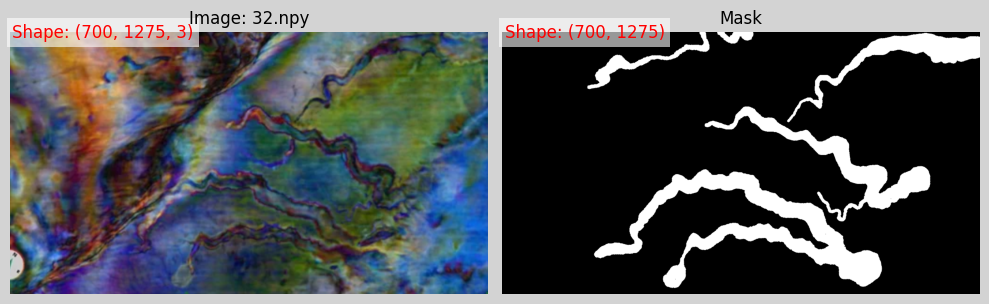

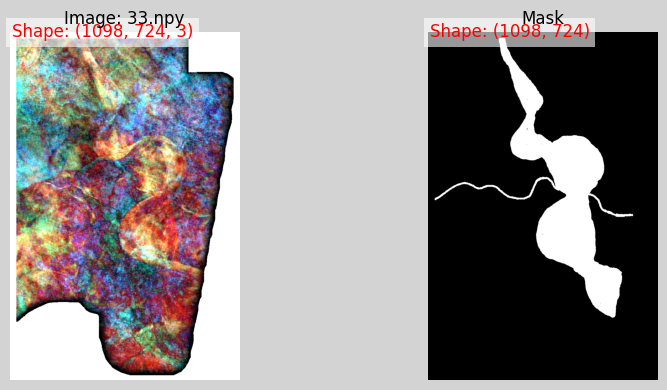

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

images_dir = "../data/padded/val/images"
masks_dir = "../data/padded/val/masks"

image_files = sorted([
    f for f in os.listdir(images_dir)
    if f.endswith(".npy")
])

for fname in image_files:
    img_path = os.path.join(images_dir, fname)
    mask_path = os.path.join(masks_dir, fname)

    if not os.path.exists(mask_path):
        print(f"[SKIP] нет маски для {fname}")
        continue

    image = np.load(img_path)
    mask = np.load(mask_path)

    # Создаем figure с серым фоном
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), facecolor='lightgray')

    # Для изображения
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title(f"Image: {fname}")
    axes[0].set_facecolor('lightgray')
    axes[0].axis("off")
    # Добавляем шейп прямо на картинку
    axes[0].text(5, 15, f"Shape: {image.shape}", color="red", fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    # Для маски
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title("Mask")
    axes[1].set_facecolor('lightgray')
    axes[1].axis("off")
    axes[1].text(5, 15, f"Shape: {mask.shape}", color="red", fontsize=12,
                 bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

    plt.tight_layout()
    plt.show()
